# Práctica 1. Aprendizaje Automático

Authors: Carlos Iborra Llopis (100451170), Alejandra Galán Arrospide (100451273)


# 0. Table of contents

- [Práctica 1. Aprendizaje Automático](#práctica-1-aprendizaje-automático)
  - [0. Table of contents](#0-table-of-contents)
  - [1. Requirements](#1-requirements)
  - [2. Reading the datasets](#2-reading-the-datasets)
  - [3. Exploratory Data Analysis](#3-EDA)


# 1. Requirements


In [1]:
""" Importing necessary libraries """
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import scipy.stats as st
import scipy
import sklearn

from matplotlib.cbook import boxplot_stats as bps


### 1.1. Cleaning ../data/img/ folder
This way we avoid creating multiple images and sending the old ones to the trash.<br>
Also using this to upload cleaner commits to GitHub.


In [2]:
""" Cleaning the ../data/img/ folder """
import os
import glob

files = glob.glob('../data/img/*')
for f in files:
    if os.path.isfile(f) and f.endswith('.png'):
        os.remove(f)

files = glob.glob('../data/img/box-plot/*')
for f in files:
    if os.path.isfile(f) and f.endswith('.png'):
        os.remove(f)


# 2. Reading the datasets

Reading the datasets from the bz2 files, group 2.


In [3]:
""" Reading the dataset """
disp_df = pd.read_csv("../data/disp_st2ns1.txt.bz2",
                      compression="bz2", index_col=0)
comp_df = pd.read_csv("../data/comp_st2ns1.txt.bz2",
                      compression="bz2", index_col=0)


# 3. EDA


**Key Concepts of Exploratory Data Analysis**

- **2 types of Data Analysis**
  - Confirmatory Data Analysis
  - Exploratory Data Analysis
- **4 Objectives of EDA**
  - Discover Patterns
  - Spot Anomalies
  - Frame Hypothesis
  - Check Assumptions
- **2 methods for exploration**
  - Univariate Analysis
  - Bivariate Analysis
- **Stuff done during EDA**
  - Trends
  - Distribution
  - Mean
  - Median
  - Outlier
  - Spread measurement (SD)
  - Correlations
  - Hypothesis testing
  - Visual Exploration


## 3.1. Dataset description

- **apcp_sfc**: 3-Hour accumulated precipitation at the surface (kg·m⁽⁻²⁾)
- **dlwrf_sfc**: Downward long-wave radiative flux average at the surface (W·m⁽⁻²⁾)
- **dswrf_sfc**: Downward short-wave radiative flux average at the surface (W·m⁽⁻²⁾)
- **pres_msl**: Air pressure at mean sea level (Pa)
- **pwat_eatm**: Precipitable Water over the entire depth of the atmosphere (kg·m⁽⁻²⁾)
- **spfh_2m**: Specific Humidity at 2 m above ground (kg·kg⁽⁻¹⁾)
- **tcdc_eatm**: Total cloud cover over the entire depth of the atmosphere (%)
- **tcolc_eatm**: Total column-integrated condensate over the entire atmos. (kg·m⁽⁻²⁾)
- **tmax_2m**: Maximum Temperature over the past 3 hours at 2 m above the ground (K)
- **tmin_2m**: Mininmum Temperature over the past 3 hours at 2 m above the ground (K)
- **tmp_2m**: Current temperature at 2 m above the ground (K)
- **tmp_sfc**: Temperature of the surface (K)
- **ulwrf_sfc**: Upward long-wave radiation at the surface (W·m⁽⁻²⁾)
- **ulwrf_tatm**: Upward long-wave radiation at the top of the atmosphere (W·m⁽⁻²⁾)
- **uswrf_sfc**: Upward short-wave radiation at the surface (W·m⁽⁻²⁾)


In [4]:
# Display all the columns of the dataframe
pd.set_option('display.max_columns', None)

disp_df.describe()


,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,dswrf_s1_1,dswrf_s2_1,dswrf_s3_1,dswrf_s4_1,dswrf_s5_1,pres_ms1_1,pres_ms2_1,pres_ms3_1,pres_ms4_1,pres_ms5_1,pwat_ea1_1,pwat_ea2_1,pwat_ea3_1,pwat_ea4_1,pwat_ea5_1,spfh_2m1_1,spfh_2m2_1,spfh_2m3_1,spfh_2m4_1,spfh_2m5_1,tcdc_ea1_1,tcdc_ea2_1,tcdc_ea3_1,tcdc_ea4_1,tcdc_ea5_1,tcolc_e1_1,tcolc_e2_1,tcolc_e3_1,tcolc_e4_1,tcolc_e5_1,tmax_2m1_1,tmax_2m2_1,tmax_2m3_1,tmax_2m4_1,tmax_2m5_1,tmin_2m1_1,tmin_2m2_1,tmin_2m3_1,tmin_2m4_1,tmin_2m5_1,tmp_2m_1_1,tmp_2m_2_1,tmp_2m_3_1,tmp_2m_4_1,tmp_2m_5_1,tmp_sfc1_1,tmp_sfc2_1,tmp_sfc3_1,tmp_sfc4_1,tmp_sfc5_1,ulwrf_s1_1,ulwrf_s2_1,ulwrf_s3_1,ulwrf_s4_1,ulwrf_s5_1,ulwrf_t1_1,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
count,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4.380000e+03
mean,0.606809,0.252764,0.480446,0.271476,0.514641,316.698532,317.381851,324.682998,343.757513,343.097254,0.070693,163.547696,375.982939,685.232316,507.620569,101724.224223,101779.516825,101746.997257,101542.138914,101503.806442,21.412453,21.577143,22.172867,22.628942,22.419481,0.007851,0.008863,0.009370,0.009483,0.009927,0.069813,0.069181,0.065218,0.065575,0.061610,0.070115,0.069504,0.065527,0.065919,0.061997,286.998221,288.368218,292.889562,294.567249,294.625310,284.644851,284.697383,284.678400,292.825082,291.176236,284.897279,288.305418,292.829753,294.385505,291.386512,284.142094,289.314751,295.635538,295.995843,290.450591,376.183645,382.345516,401.169657,439.634087,431.819393,247.683051,247.300145,251.597699,261.916025,260.870143,0.076235,38.585222,76.064674,126.504047,99.087049,1.629826e+07
std,2.275740,0.999809,1.774720,1.086599,1.886735,55.637609,57.874376,58.702133,60.860672,60.693451,0.295001,112.394328,159.517593,228.049707,193.860461,721.839730,728.790723,718.552527,698.496042,714.652866,12.136053,12.264956,12.495203,12.543698,12.310466,0.004374,0.005020,0.005165,0.005088,0.005442,0.167006,0.170252,0.169748,0.169143,0.162010,0.166901,0.170133,0.169632,0.169005,0.161853,8.851120,9.686553,9.827525,9.708510,9.696085,8.663294,8.796469,8.800662,9.880096,10.026533,8.652794,9.738082,9.873836,9.716331,10.015781,8.794389,9.702728,9.070324,9.231690,10.402144,46.178756,49.619215,50.445754,52.695819,53.978436,36.353242,36.804219,36.382653,39.190955,38.734023,0.255491,25.984861,30.784078,40.571154,35.454368,7.965298e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,158.971770,160.032903,165.524543,183.671312,186.342961,0.000000,0.000000,20.000000,30.000000,20.000000,99316.970881,99097.036222,98946.524858,99010.708097,98830.153409,1.100000,1.314819,1.107352,1.142803,1.201246,0.000462,0.000485,0.000451,0.000478,0.000468,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,254.589220,254.937418,258.549777,260.800365,260.863475,251.941358,249.576132,249.576714,258.698331,258.171345,251.942065,254.844406,258.552646,260.795430,258.170049,250.100794,256.360800,263.634377,264.533564,256.520408,227.242239,223.985486,246.314349,278.576630,271.707606,104.671267,113.559602,118.679132,

In [5]:
disp_df.shape


(4380, 76)

In [6]:
disp_df.head()


,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,dswrf_s1_1,dswrf_s2_1,dswrf_s3_1,dswrf_s4_1,dswrf_s5_1,pres_ms1_1,pres_ms2_1,pres_ms3_1,pres_ms4_1,pres_ms5_1,pwat_ea1_1,pwat_ea2_1,pwat_ea3_1,pwat_ea4_1,pwat_ea5_1,spfh_2m1_1,spfh_2m2_1,spfh_2m3_1,spfh_2m4_1,spfh_2m5_1,tcdc_ea1_1,tcdc_ea2_1,tcdc_ea3_1,tcdc_ea4_1,tcdc_ea5_1,tcolc_e1_1,tcolc_e2_1,tcolc_e3_1,tcolc_e4_1,tcolc_e5_1,tmax_2m1_1,tmax_2m2_1,tmax_2m3_1,tmax_2m4_1,tmax_2m5_1,tmin_2m1_1,tmin_2m2_1,tmin_2m3_1,tmin_2m4_1,tmin_2m5_1,tmp_2m_1_1,tmp_2m_2_1,tmp_2m_3_1,tmp_2m_4_1,tmp_2m_5_1,tmp_sfc1_1,tmp_sfc2_1,tmp_sfc3_1,tmp_sfc4_1,tmp_sfc5_1,ulwrf_s1_1,ulwrf_s2_1,ulwrf_s3_1,ulwrf_s4_1,ulwrf_s5_1,ulwrf_t1_1,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
V1,0.0,0.0,0.0,0.000000,0.0,268.583582,244.241641,251.174486,269.741308,268.377441,0.0,30.0,220.000000,510.000000,330.000000,101832.056108,102053.159091,102090.046165,101934.175426,101988.003551,5.879193,7.018182,8.460800,9.418182,9.727869,0.003229,0.002993,0.003775,0.003870,0.003855,0.000000,0.000000,0.000000,0.000000,0.000909,0.000818,0.000264,0.000255,0.000500,0.002218,280.789784,279.627444,285.727761,286.881681,286.885823,279.198020,278.472615,278.474720,285.799685,280.966961,279.249256,279.612202,285.742784,286.841053,280.960865,277.278370,279.250383,288.826760,288.596086,278.500078,341.122231,335.067918,354.626126,397.774053,383.281225,222.153166,252.504475,254.760271,263.342404,260.067843,0.0,10.000000,50.000000,106.636364,72.000000,11930700
V2,0.0,0.0,0.0,0.008182,0.2,251.725869,255.824126,272.163913,318.259924,307.929083,0.0,30.0,173.636364,333.636364,224.545455,101425.883523,101284.509233,101253.654830,100999.313920,101424.626420,12.534339,11.987316,12.159355,12.313590,13.469729,0.003737,0.003931,0.004015,0.003994,0.004826,0.037273,0.021818,0.101818,0.084545,0.109091,0.037155,0.021309,0.102373,0.085827,0.109336,278.822329,278.063379,283.618583,286.606684,286.643397,277.258919,276.740628,276.740628,283.687009,282.111078,277.282621,278.070390,283.604600,286.554729,282.105011,275.830009,278.269459,287.048970,287.325478,281.005252,330.159915,329.354673,347.524819,388.017767,378.773804,236.836691,233.458263,233.027276,212.652054,222.052916,0.0,8.181818,35.909091,58.181818,42.090909,9778500
V3,0.0,0.0,0.0,0.000000,0.0,219.734547,211.996022,216.405820,235.529123,239.840132,0.0,30.0,220.000000,523.636364,337.545455,102253.654119,102301.918324,102088.093750,101652.815341,101543.146307,5.726770,5.458528,5.700000,7.163636,9.536364,0.002003,0.001919,0.002107,0.002431,0.002583,0.000000,0.000000,0.007273,0.007273,0.042727,0.001427,0.001582,0.007309,0.006973,0.042127,275.400091,270.222512,275.885787,279.049513,279.381653,269.756037,269.157731,269.156439,276.041792,275.301960,269.766876,270.204285,275.880818,279.064603,275.806757,269.533059,271.690993,281.759993,282.686446,273.615503,309.639845,299.751961,317.250763,364.339136,351.496665,238.655654,232.828737,235.480750,245.177331,238.893102,0.0,10.272727,55.272727,118.454545,79.181818,9771900
V4,0.0,0.0,0.0,0.000000,0.0,253.499410,230.896544,235.857221,240.274556,237.804048,0.0,30.0,208.181818,512.727273,337.181818,102110.375710,102435.603693,102688.528409,102588.876420,102598.252841,7.889904,6.768959,6.208357,5.977267,6.411838,0.002918,0.002735,0.002771,0.002821,0.002738,0.000000,0.002727,0.005455,0.000909,0.012727,0.000473,0.004018,0.007300,0.001600,0.014882,279.396046,276.176919,276.868630,278.550368,278.572038,276.175482,273.839142,273.840535,276.942990,273.802970,276.312428,274.045715,276.877749,278.571555,273.812827,274.824765,274.466433,281.291418,281.871679,272.191753,330.310971,318.761563,329.305478,360.297788,348.618319,236.784869,241.916776,243.398572,251.473036,247.503769,0.0,8.909091,46.000000,107.090909,73.636364,6466800
V5,0.0,0.0,0.0,0.000000,0.0,234.890020,238.927051,246.850822,271.577246,275.572826,0.0,30.0,220.000000,517.272727,336.363636,101750.

In [7]:
disp_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4380 entries, V1 to V4380
Data columns (total 76 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   apcp_sf1_1  4380 non-null   float64
 1   apcp_sf2_1  4380 non-null   float64
 2   apcp_sf3_1  4380 non-null   float64
 3   apcp_sf4_1  4380 non-null   float64
 4   apcp_sf5_1  4380 non-null   float64
 5   dlwrf_s1_1  4380 non-null   float64
 6   dlwrf_s2_1  4380 non-null   float64
 7   dlwrf_s3_1  4380 non-null   float64
 8   dlwrf_s4_1  4380 non-null   float64
 9   dlwrf_s5_1  4380 non-null   float64
 10  dswrf_s1_1  4380 non-null   float64
 11  dswrf_s2_1  4380 non-null   float64
 12  dswrf_s3_1  4380 non-null   float64
 13  dswrf_s4_1  4380 non-null   float64
 14  dswrf_s5_1  4380 non-null   float64
 15  pres_ms1_1  4380 non-null   float64
 16  pres_ms2_1  4380 non-null   float64
 17  pres_ms3_1  4380 non-null   float64
 18  pres_ms4_1  4380 non-null   float64
 19  pres_ms5_1  4380 non-null   fl

## 3.2. Missing values


Fist, we check the number the total number of missing values in the dataset in order to know if we have to clean the dataset or not.

In [8]:
disp_df.isna().sum()


apcp_sf1_1    0
apcp_sf2_1    0
apcp_sf3_1    0
apcp_sf4_1    0
apcp_sf5_1    0
             ..
uswrf_s2_1    0
uswrf_s3_1    0
uswrf_s4_1    0
uswrf_s5_1    0
salida        0
Length: 76, dtype: int64

As we can oberve, there are no missing values in the dataset, but theres still the possibility of having missing values measured as 0's, so we will check if all those zeros make sense in the context of the dataset or not.

<AxesSubplot:>

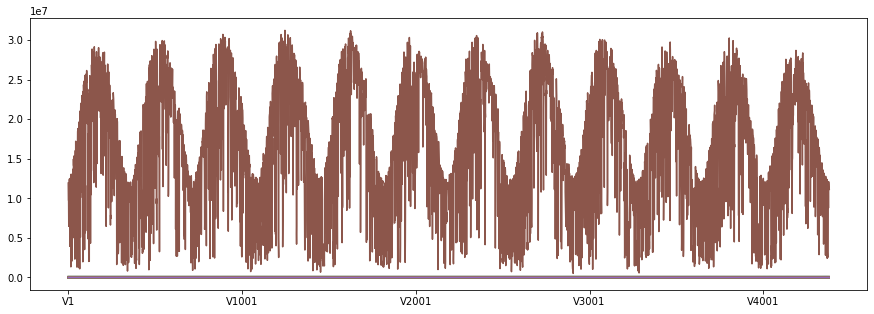

In [9]:
# In the plot, we can see that there are a lot of 0 values in the dataset
disp_df.plot(legend=False, figsize=(15, 5))


In [10]:
result = disp_df.eq(0.0).sum()/len(disp_df)*100

# Select those columns with more than 30% of zeros
result = result[result > 30.0]
result = result.sort_values(ascending=False)
result


dswrf_s1_1    92.054795
uswrf_s1_1    90.844749
apcp_sf4_1    63.378995
apcp_sf5_1    61.278539
apcp_sf1_1    61.164384
apcp_sf2_1    60.296804
apcp_sf3_1    57.305936
tcdc_ea3_1    37.945205
tcdc_ea1_1    37.237443
tcdc_ea2_1    37.123288
tcdc_ea5_1    36.004566
tcdc_ea4_1    35.547945
dtype: float64

### Observations

As output of the previous cell, we can see that there exist a lot of zeros in the dataset, let's analize if those zeros make sense or not.

The variables with most ammount of zeros (>30%) are:

- **dswrf_s1_1**: Downward short-wave radiative flux average at the surface, at 12:00 UTC, normal to have a lot of zeros as it is not sunny at 12:00
- **uswrf_s1_1**: Upward short-wave radiation at the surface, at 12:00 UTC, normal to have a lot of zeros as it is not sunny at 12:00
- **apcp_s**: 3-Hour accumulated precipitation at the surface, as it is not raining every day, it is normal to have a lot of zeros
- **tcdc_ea**: Total cloud cover over the entire depth of the atmosphere, as it is not cloudy every day, it is normal to have a lot of zeros


First, lets start by assigning the zeros to NaNs. By doing this we can visualize the varibles that take more values other than zero.


In [11]:
disp_df_nan = disp_df.replace(0.0, np.nan)


<AxesSubplot:>

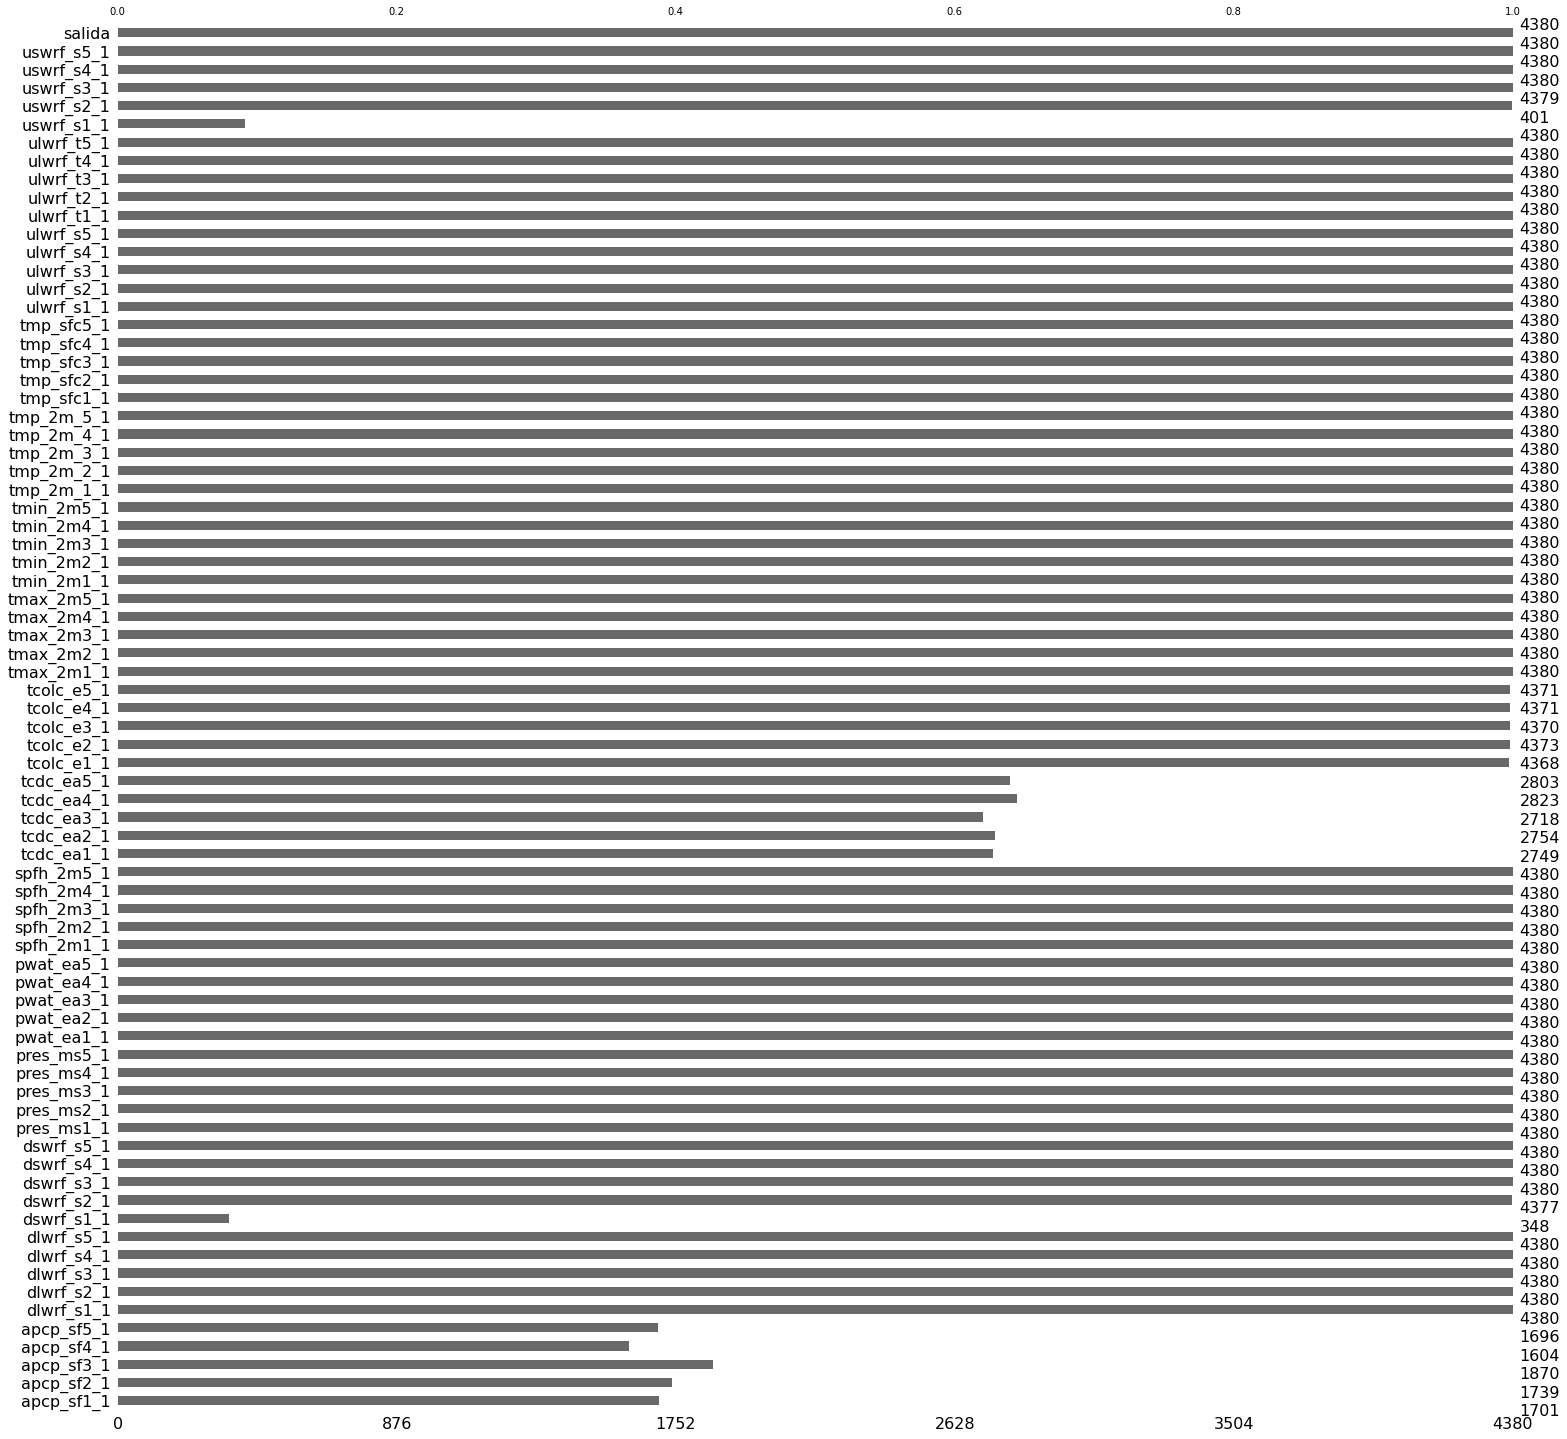

In [12]:
""" Plotting missing values """
# Sustitute 0.0 values with NaN and plot the name of the columns with missing values
# ? msno.bar is a simple visualization of nullity by column
msno.bar(disp_df_nan) 

# Exporting image as png to ../data/img folder
#plt.savefig("../data/img/missing_values_bar.png")


FileNotFoundError: [Errno 2] No such file or directory: '../data/img/missing_values_matrix.png'

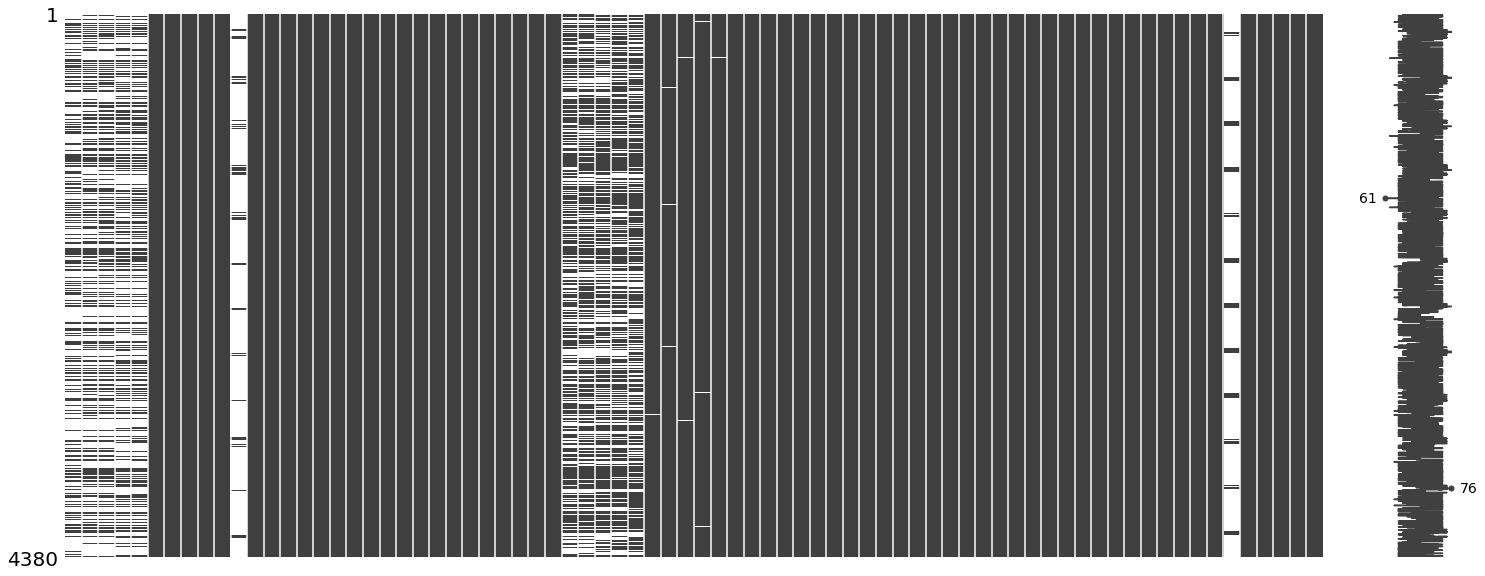

In [13]:
""" Plotting the missing values in a matrix """
# ? The msno.matrix nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion.
msno.matrix(disp_df_nan)

# Exporting image as png to ../data/img folder
plt.savefig("../data/img/missing_values_matrix.png")


In [ ]:
""" Plotting the missing values in a heatmap """
# As in a hetmap not every value is shown, we must delimit the values to the ones with more than 30% of missing values
result = disp_df.eq(0.0).sum()/len(disp_df)*100
result = result[result > 30.0] # Select those columns with more than 30% of zeros
result = result.sort_values(ascending=False)
result = result.index.tolist() # Convert to list
result

# ? The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another
msno.heatmap(disp_df_nan[result], fontsize=7, figsize=(15, 7))

# Exporting image as png to ../data/img folder
plt.savefig("../data/img/missing_values_heatmap.png")


In [ ]:
""" Plotting the dendrogram """

# ? The dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap:
msno.dendrogram(disp_df_nan, orientation="top",fontsize=7, figsize=(15, 7))

# Exporting image as png to ../data/img folder
plt.savefig("../data/img/missing_values_dendrogram.png")


### Conclusions
In this section, we have observe that there are no attibutes with 'Null' nor 'NaN' nor 'None' values. This indicated that at a first glance, the data is clean, at least of those datatypes.

In second place, we have observed that the attributes that we suspected could have an important number of missing values (represented by 0 instead of the previously mentioned), had instead valuable information, as we have proved along this section.<br>Since the data is clean and we have concluded there are no missing values, we do not need to complete them using a model or other methods, so we can move on to the next step, observing the outliers.

## 3.3. Outliers


With the objective of noticing the outliers on each attribute, we create a box-plot of each of the attributes 

In [ ]:
list_of_attributes = disp_df.columns.values.tolist()
#print(list_of_attributes)

In [ ]:
# Boxplot with all attributes in the dataset
# sns.boxplot(data=disp_df, orient="h")
# plt.show()

In [ ]:
disp_df.describe()

,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,dswrf_s1_1,dswrf_s2_1,dswrf_s3_1,dswrf_s4_1,dswrf_s5_1,pres_ms1_1,pres_ms2_1,pres_ms3_1,pres_ms4_1,pres_ms5_1,pwat_ea1_1,pwat_ea2_1,pwat_ea3_1,pwat_ea4_1,pwat_ea5_1,spfh_2m1_1,spfh_2m2_1,spfh_2m3_1,spfh_2m4_1,spfh_2m5_1,tcdc_ea1_1,tcdc_ea2_1,tcdc_ea3_1,tcdc_ea4_1,tcdc_ea5_1,tcolc_e1_1,tcolc_e2_1,tcolc_e3_1,tcolc_e4_1,tcolc_e5_1,tmax_2m1_1,tmax_2m2_1,tmax_2m3_1,tmax_2m4_1,tmax_2m5_1,tmin_2m1_1,tmin_2m2_1,tmin_2m3_1,tmin_2m4_1,tmin_2m5_1,tmp_2m_1_1,tmp_2m_2_1,tmp_2m_3_1,tmp_2m_4_1,tmp_2m_5_1,tmp_sfc1_1,tmp_sfc2_1,tmp_sfc3_1,tmp_sfc4_1,tmp_sfc5_1,ulwrf_s1_1,ulwrf_s2_1,ulwrf_s3_1,ulwrf_s4_1,ulwrf_s5_1,ulwrf_t1_1,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
count,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4.380000e+03
mean,0.606809,0.252764,0.480446,0.271476,0.514641,316.698532,317.381851,324.682998,343.757513,343.097254,0.070693,163.547696,375.982939,685.232316,507.620569,101724.224223,101779.516825,101746.997257,101542.138914,101503.806442,21.412453,21.577143,22.172867,22.628942,22.419481,0.007851,0.008863,0.009370,0.009483,0.009927,0.069813,0.069181,0.065218,0.065575,0.061610,0.070115,0.069504,0.065527,0.065919,0.061997,286.998221,288.368218,292.889562,294.567249,294.625310,284.644851,284.697383,284.678400,292.825082,291.176236,284.897279,288.305418,292.829753,294.385505,291.386512,284.142094,289.314751,295.635538,295.995843,290.450591,376.183645,382.345516,401.169657,439.634087,431.819393,247.683051,247.300145,251.597699,261.916025,260.870143,0.076235,38.585222,76.064674,126.504047,99.087049,1.629826e+07
std,2.275740,0.999809,1.774720,1.086599,1.886735,55.637609,57.874376,58.702133,60.860672,60.693451,0.295001,112.394328,159.517593,228.049707,193.860461,721.839730,728.790723,718.552527,698.496042,714.652866,12.136053,12.264956,12.495203,12.543698,12.310466,0.004374,0.005020,0.005165,0.005088,0.005442,0.167006,0.170252,0.169748,0.169143,0.162010,0.166901,0.170133,0.169632,0.169005,0.161853,8.851120,9.686553,9.827525,9.708510,9.696085,8.663294,8.796469,8.800662,9.880096,10.026533,8.652794,9.738082,9.873836,9.716331,10.015781,8.794389,9.702728,9.070324,9.231690,10.402144,46.178756,49.619215,50.445754,52.695819,53.978436,36.353242,36.804219,36.382653,39.190955,38.734023,0.255491,25.984861,30.784078,40.571154,35.454368,7.965298e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,158.971770,160.032903,165.524543,183.671312,186.342961,0.000000,0.000000,20.000000,30.000000,20.000000,99316.970881,99097.036222,98946.524858,99010.708097,98830.153409,1.100000,1.314819,1.107352,1.142803,1.201246,0.000462,0.000485,0.000451,0.000478,0.000468,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,254.589220,254.937418,258.549777,260.800365,260.863475,251.941358,249.576132,249.576714,258.698331,258.171345,251.942065,254.844406,258.552646,260.795430,258.170049,250.100794,256.360800,263.634377,264.533564,256.520408,227.242239,223.985486,246.314349,278.576630,271.707606,104.671267,113.559602,118.679132,

In [ ]:
## disp_df['apcp_sf1_1'].value_counts()

Here, by plotting the boxplots and making the outliers (fliers) visible, we are able to see some outliers in the dataset.<br>
Take into account that the outliers are represented by the points outside the boxplot and they can be potentially wrong values or just values that are not usual in the dataset (ruido).

FileNotFoundError: [Errno 2] No such file or directory: '../data/img/box-plot/apcp_sf1_1.png'

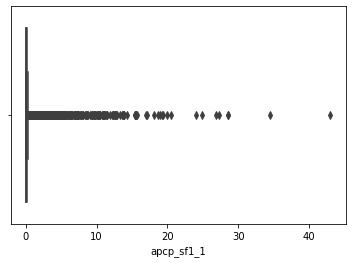

In [ ]:
""" Plotting the boxplot for each attribute and getting the outliers of each attribute """
total_outliers = []
# * We iterate over the list of attributes
for attribute in list_of_attributes:
    # * sns.regplot(x=disp_df[attribute], y=disp_df['total'], fit_reg=False)
    sns.boxplot(data=disp_df[attribute], x=disp_df[attribute], orient="h")
    # * Use the command below to show each plot (small size for visualization sake)
    # sns.set(rc={'figure.figsize':(1,.5)})
    # plt.show()
    # * All the images are saved in the folder ../data/img/box-plot
    plt.savefig(f"../data/img/box-plot/{str(attribute)}.png")

    # We obtain the a list of outliers for each attribute
    list_of_outliers = disp_df[attribute][disp_df[attribute] > disp_df[attribute].quantile(0.75) + 1.5*(disp_df[attribute].quantile(0.75) - disp_df[attribute].quantile(0.25))].tolist()
    outliers = [f'{attribute} outliers'] + [len(list_of_outliers)] + [list_of_outliers]
    # * In orde to print the total number of outliers for each attribute
    # print(f'{attribute} has {len(list_of_outliers)} outliers')
    # ! Data structure: [attribute, number of outliers, list of outliers]
    print(outliers)
    total_outliers.append(outliers)

print(total_outliers)


We managed to create a list containing the name of the atribute, the number of outliers and the value of the outliers for each attribute, calculated by applying the IQR method.<br> This is relevant as we managed to create a 'total_outliers' variable that contains the list data structures of all the different outliers from all the attributes, so that it can be easily accessed in a future to remove the outliers from the dataset if needed for testing purposes.

As suspected, we can see that there are a lot of outliers in the dataset, therefore it is plausible that some of them are noise, thus possibly being removed in a future model in order to improve it.<br>Now, we need to analyze if they are the result of bad measurements or if they are significant data for the analysis.


In [ ]:
""" Skewness """
# ? skewness: measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.
disp_df.skew().sort_values(ascending=False)

In [ ]:
""" Kurtosis """
# ? kurtosis: measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.
disp_df.kurt().sort_values(ascending=False)

In [ ]:
y = disp_df['apcp_sf4_1']
plt.figure(1); plt.title('Normal')
sns.distplot(y, kde=True, fit=st.norm)
plt.figure(2); plt.title('Log Normal')
sns.distplot(y, kde=True, fit=st.lognorm)

In [ ]:
sns.distplot(disp_df.skew(),color='blue',axlabel ='Skewness')

In [ ]:
plt.figure(figsize = (12,8))
sns.distplot(disp_df.kurt(),color='r',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)
#plt.hist(train.kurt(),orientation = 'vertical',histtype = 'bar',label ='Kurtosis', color ='blue')
plt.show()

## 3.4. Correlation


In this section we are getting information about the correlation of the variables between them. This information is valuable in order to make good decisions when deleting redundant attributes. Also note we are getting information about the correlation between each attribute and the solution variable. This allows us to know the most relevant attributes, making the best decisions when creating the different models.  

In [ ]:
correlation = disp_df.corr()
correlation = abs(correlation)
print(correlation)  # 76 x 76 matrix of correlation values

            apcp_sf1_1  apcp_sf2_1  apcp_sf3_1  apcp_sf4_1  apcp_sf5_1  \
apcp_sf1_1    1.000000    0.587239    0.509665    0.249329    0.255535   
apcp_sf2_1    0.587239    1.000000    0.926354    0.394384    0.379884   
apcp_sf3_1    0.509665    0.926354    1.000000    0.574310    0.533648   
apcp_sf4_1    0.249329    0.394384    0.574310    1.000000    0.928523   
apcp_sf5_1    0.255535    0.379884    0.533648    0.928523    1.000000   
...                ...         ...         ...         ...         ...   
uswrf_s2_1    0.161360    0.204639    0.212301    0.135941    0.148588   
uswrf_s3_1    0.228271    0.313188    0.343573    0.252657    0.272716   
uswrf_s4_1    0.181360    0.279789    0.340832    0.350630    0.371776   
uswrf_s5_1    0.145594    0.235880    0.291234    0.309841    0.335141   
salida        0.171532    0.248745    0.282336    0.249886    0.275859   

            dlwrf_s1_1  dlwrf_s2_1  dlwrf_s3_1  dlwrf_s4_1  dlwrf_s5_1  \
apcp_sf1_1    0.252467    0.229487   

### Getting the correlation matrix formatted into our own data structure
This is done for the sake of simplicity and to be able to visualize the correlation matrix in a more intuitive way.


In [ ]:
correlation_list = []

for column in disp_df:
    correlation[column] = abs(correlation[column])
    mask = correlation[column] > 0.95
    # print(correlation[column][mask].sort_values(ascending = False))
    
    # Translate the comment below to English: 
    # we add the correlation values to a list of lists, which contains the names of the correlated columns and their correlation index
    
    # The first segment adds the name of the column we are analyzing
    # The second segment adds the names of the columns correlated (except the column we are analyzing) > 0.95
    # The third segment adds the correlation index of the columns correlated (except the column we are analyzing) > 0.95
    # Second and third segment are added to the first segment as a list of lists
    
    # First we need to create a dictionary with the column names and their correlation values (except the column we are analyzing)
    dict = ({key: value for key, value in correlation[column][mask].sort_values(ascending = False).to_dict().items() if key != column})
    # print (dict)
    
    # Then we create a list of lists with the column names and their correlation values from the dictionary created above
    corr_list = [[key] + [value] for key, value in dict.items()]
    # Finally we add the name of the column we are analyzing to the list of lists created above as the first element of the list (str)
    corr_list.insert(0, f"Columna: {column}")
    
    # ! Data structure: [[columna, [columna correlada 1, indice de correlacion], [columna correlada 2, indice de correlacion], ...], ...] 
    print(corr_list)
    
    correlation_list += [corr_list]
print(correlation_list)

['Columna: apcp_sf1_1']
['Columna: apcp_sf2_1']
['Columna: apcp_sf3_1']
['Columna: apcp_sf4_1']
['Columna: apcp_sf5_1']
['Columna: dlwrf_s1_1', ['dlwrf_s2_1', 0.9654602451282467], ['dlwrf_s3_1', 0.9555714275535937]]
['Columna: dlwrf_s2_1', ['dlwrf_s3_1', 0.993801937354884], ['dlwrf_s1_1', 0.9654602451282467]]
['Columna: dlwrf_s3_1', ['dlwrf_s2_1', 0.993801937354884], ['dlwrf_s4_1', 0.9664287191255341], ['dlwrf_s5_1', 0.955638710623432], ['dlwrf_s1_1', 0.9555714275535937]]
['Columna: dlwrf_s4_1', ['dlwrf_s5_1', 0.9968432736329301], ['dlwrf_s3_1', 0.9664287191255341]]
['Columna: dlwrf_s5_1', ['dlwrf_s4_1', 0.9968432736329301], ['dlwrf_s3_1', 0.955638710623432]]
['Columna: dswrf_s1_1']
['Columna: dswrf_s2_1', ['uswrf_s2_1', 0.9912815245133624], ['dswrf_s3_1', 0.9503100565387964]]
['Columna: dswrf_s3_1', ['uswrf_s2_1', 0.9591543590605579], ['dswrf_s2_1', 0.9503100565387964]]
['Columna: dswrf_s4_1', ['dswrf_s5_1', 0.9825798647066863]]
['Columna: dswrf_s5_1', ['dswrf_s4_1', 0.982579864706686

### Correlation Heat Map

FileNotFoundError: [Errno 2] No such file or directory: '../data/img/correlation_heatmap.png'

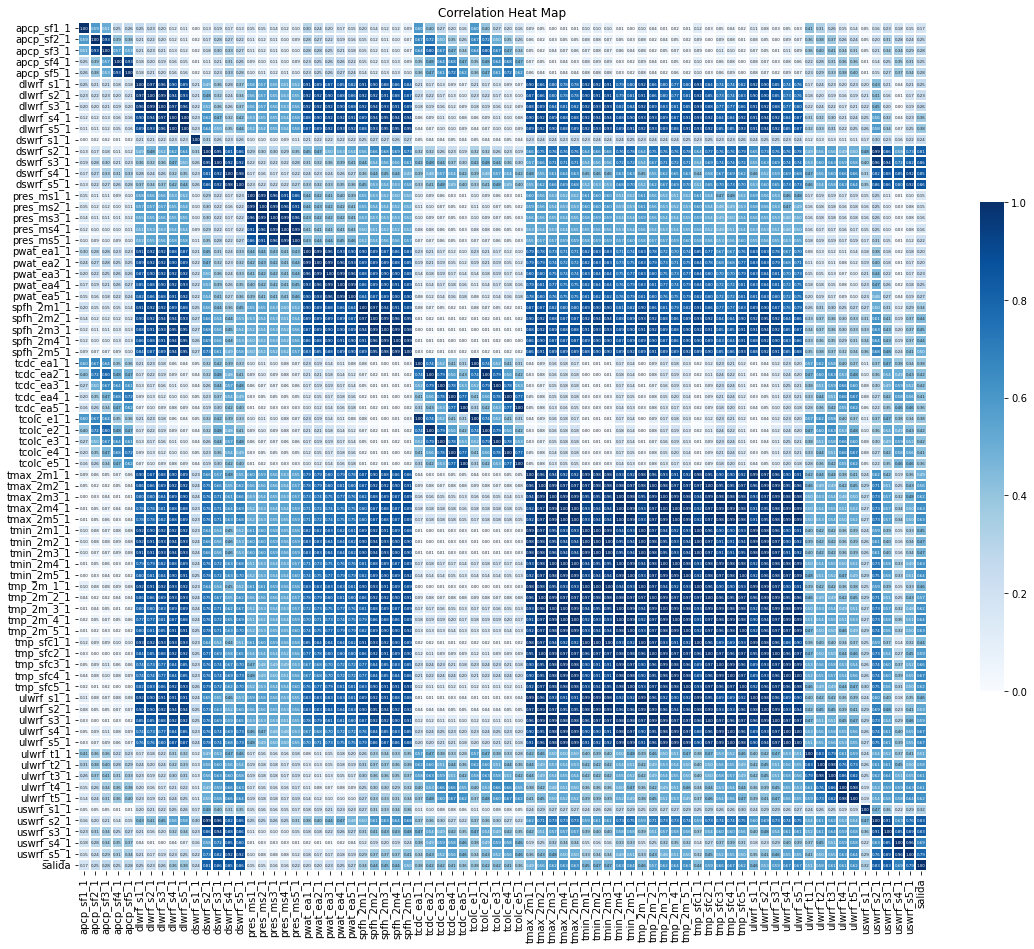

In [ ]:
""" seaborne Correlation Heat Map """

# It needs to show all the columns
fig, ax = plt.subplots(figsize=(19,18))

plt.title('Correlation Heat Map',y=1)
# We use blue color scale because it is easier to see the annotations and the correlation values
sns.heatmap(correlation, square=True, cmap='Blues', annot=True, fmt='.2f', annot_kws={'size': 4}, linewidths=.3, cbar_kws={"shrink": .5}, vmin=0.0, vmax=1)
# We can modify vmax=0.95 in order to get same color scale for values with more than 0.95 correlation
# Note: it delays around 15 seconds as it needs to plot a 76*76 matrix with its 5766 correlation values

# Exporting image as png to ../data/img folder - easier to visualize the annotations, better resolution
plt.savefig("../data/img/correlation_heatmap.png", dpi=200)


Once obtained the most correlated columns of the dataset, we can plot them and visualize their correlation.

In [ ]:
# 1

sns.set(), sns.set(font_scale=.75)
columns = []

columns = ['apcp_sf1_1', 'apcp_sf2_1', 'apcp_sf3_1','apcp_sf4_1', 'apcp_sf5_1']

sns.pairplot(disp_df[columns], size = 1 ,kind ='scatter',diag_kind='kde')
plt.show()


In [ ]:
# 2

sns.set(), sns.set(font_scale=.75)
columns = []

columns = [ 'dlwrf_s1_1', 'dlwrf_s2_1', 'dlwrf_s3_1', 'dlwrf_s4_1', 'dlwrf_s5_1']

sns.pairplot(disp_df[columns], size = 1 ,kind ='scatter',diag_kind='kde')
plt.show()


In [ ]:
# 3

sns.set(), sns.set(font_scale=.75)
columns = []

columns = ['pwat_ea1_1', 'pwat_ea2_1','pwat_ea3_1','pwat_ea4_1','pwat_ea5_1', 'dlwrf_s1_1', 'dlwrf_s2_1', 'dlwrf_s3_1', 'dlwrf_s4_1', 'dlwrf_s5_1']

sns.pairplot(disp_df[columns], size = 1 ,kind ='scatter',diag_kind='kde')
plt.show()


In [ ]:
# 4

sns.set(), sns.set(font_scale=.75)
columns = []

columns = ['dswrf_s1_1', 'dswrf_s2_1', 'dswrf_s3_1', 'dswrf_s4_1', 'dswrf_s5_1']

sns.pairplot(disp_df[columns], size = 1 ,kind ='scatter',diag_kind='kde')
plt.show()


In [ ]:
# 5

sns.set(), sns.set(font_scale=.75)
columns = []

columns = ['dswrf_s1_1', 'dswrf_s2_1', 'dswrf_s3_1', 'dswrf_s4_1', 'dswrf_s5_1', 'uswrf_s1_1', 'uswrf_s2_1', 'uswrf_s3_1', 'uswrf_s4_1', 'uswrf_s5_1']

sns.pairplot(disp_df[columns], size = 1 ,kind ='scatter',diag_kind='kde')
plt.show()


In [ ]:
# 6

sns.set(), sns.set(font_scale=.75)
columns = []

columns = ['pres_ms1_1', 'pres_ms2_1', 'pres_ms3_1', 'pres_ms4_1', 'pres_ms5_1']

sns.pairplot(disp_df[columns], size = 1 ,kind ='scatter',diag_kind='kde')
plt.show()

In [ ]:
# 7

sns.set(), sns.set(font_scale=.75)
columns = []

columns = ['pwat_ea1_1', 'pwat_ea2_1','pwat_ea3_1','pwat_ea4_1','pwat_ea5_1', 'spfh_2m1_1', 'spfh_2m2_1', 'spfh_2m3_1', 'spfh_2m4_1', 'spfh_2m5_1']

sns.pairplot(disp_df[columns], size = 1 ,kind ='scatter',diag_kind='kde')
plt.show()


In [ ]:
# 8

sns.set(), sns.set(font_scale=.75)
columns = []

columns = ['spfh_2m1_1', 'spfh_2m2_1', 'spfh_2m3_1', 'spfh_2m4_1', 'spfh_2m5_1','ulwrf_s1_1', 'ulwrf_s2_1', 'ulwrf_s3_1', 'ulwrf_s4_1', 'ulwrf_s5_1']

sns.pairplot(disp_df[columns], size = 1 ,kind ='scatter',diag_kind='kde')
plt.show()


c:\Users\ALEJANDRA\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


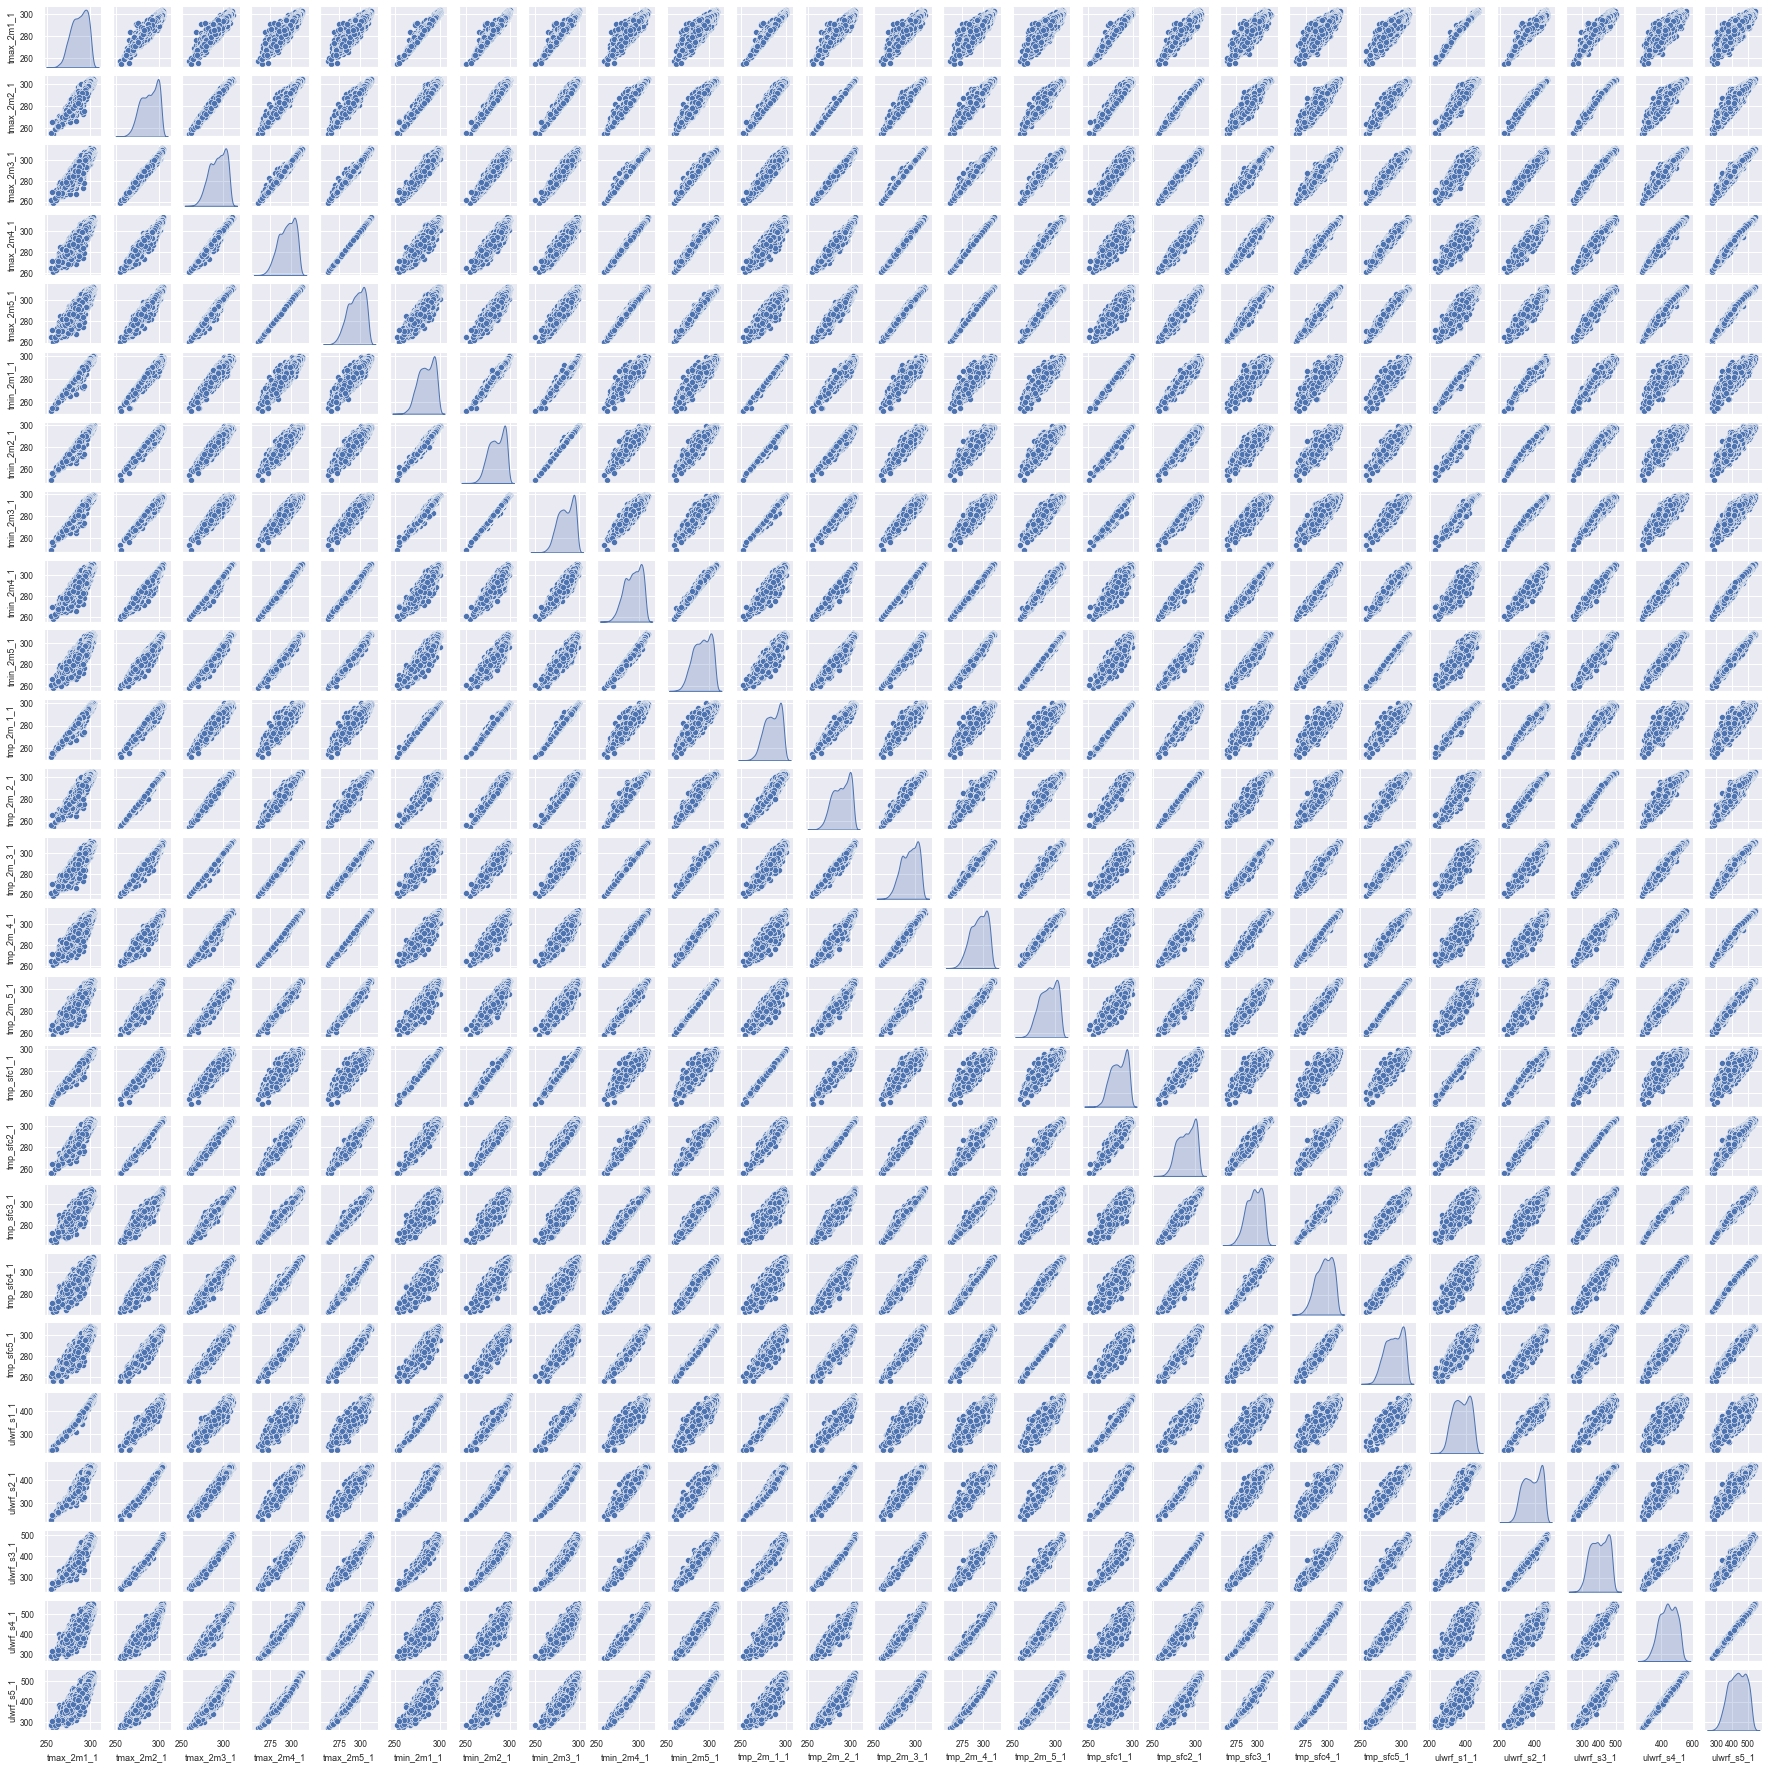

In [ ]:
# 9

sns.set(), sns.set(font_scale=.75)
columns = []

columns = ['tmax_2m1_1', 'tmax_2m2_1', 'tmax_2m3_1', 'tmax_2m4_1', 'tmax_2m5_1', 'tmin_2m1_1', 'tmin_2m2_1', 'tmin_2m3_1', 'tmin_2m4_1', 'tmin_2m5_1','tmp_2m_1_1', 'tmp_2m_2_1', 'tmp_2m_3_1', 'tmp_2m_4_1', 'tmp_2m_5_1', 'tmp_sfc1_1', 'tmp_sfc2_1', 'tmp_sfc3_1', 'tmp_sfc4_1', 'tmp_sfc5_1','ulwrf_s1_1', 'ulwrf_s2_1', 'ulwrf_s3_1', 'ulwrf_s4_1', 'ulwrf_s5_1']

sns.pairplot(disp_df[columns], size = 1 ,kind ='scatter',diag_kind='kde')
plt.show()


c:\Users\ALEJANDRA\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


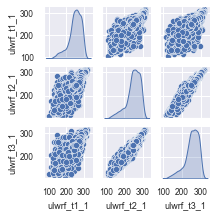

In [ ]:
# 10

sns.set(), sns.set(font_scale=.75)
columns = []

columns = ['ulwrf_t1_1', 'ulwrf_t2_1', 'ulwrf_t3_1']

sns.pairplot(disp_df[columns], size = 1 ,kind ='scatter',diag_kind='kde')
plt.show()


c:\Users\ALEJANDRA\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


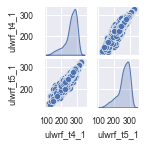

In [ ]:
# 11

sns.set(), sns.set(font_scale=.75)
columns = []

columns = ['ulwrf_t4_1', 'ulwrf_t5_1', ]

sns.pairplot(disp_df[columns], size = 1 ,kind ='scatter',diag_kind='kde')
plt.show()


c:\Users\ALEJANDRA\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


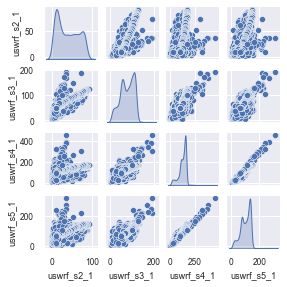

In [ ]:
# 12

sns.set(), sns.set(font_scale=.75)
columns = []

columns = ['uswrf_s2_1', 'uswrf_s3_1', 'uswrf_s4_1', 'uswrf_s5_1']

sns.pairplot(disp_df[columns], size = 1 ,kind ='scatter',diag_kind='kde')
plt.show()


As we can observe in the graphs above, the most correlated variables present a linear relationship between them. This shows as a diagonal in the graph, since both variables grow at the same time. 

# 4. Train-Test division 

Since we are working with a time dependent data, we need to avoid mixing it. Also, we are required to add the first 10 years of data to the train set and the last 2 years to the test set. This means we are assigning a 83.333333 of the data to train and a 16.66666666 to test.

### TODO: Cambiarlo al principio para hacer el eda solo con train. 

Note: `iloc` is useful when we want to split data based on the index or other criteria, while `train_test_split` is useful when wanting to randomly split data into training and testing subsets.<br>
Therefore, we will use `iloc` to split the data into train and test sets as we are dealing with time dependent data.

In [14]:

from sklearn.model_selection import train_test_split
x = disp_df.drop('salida', axis=1)
y = disp_df['salida']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1666666666, shuffle=False)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3650, 75) (3650,) (730, 75) (730,)


In [ ]:
""" Train Test Split (time series) """

# * Make a copy of the dataframe (as Padas dataframe is mutable, therefore uses a reference)
disp_df_copy = disp_df.copy()

# print(disp_df)
# print(disp_df_copy)

# Now we make the train_x, train_y, test_x, test_y splits taking into account the time series
# Note: the time series is ordered by date, therefore we need to split the data in a way that the train data is before the test data
# Note: the 10 first years are used for training and the last two years for testing
# Note: this is done because if not, we will be predicting the past from the future, which leads to errors and overfitting (data leakage) in the model

# * Calculate the number of rows for training and testing
num_rows = disp_df_copy.shape[0]
num_train_rows = int(num_rows * 10/12)  # 10 first years for training, 2 last years for testing

# * Split the data into train and test dataframes (using iloc instead of train_test_split as it picks random rows)
train_df = disp_df_copy.iloc[:num_train_rows, :]  # train contains the first 10 years of rows
test_df = disp_df_copy.iloc[num_train_rows:, :] # test contains the last 2 years of rows

# Print the number of rows for each dataframe
print(f"Number of rows for training: {train_df.shape[0]}")
print(f"Number of rows for testing: {test_df.shape[0]}")

# Print the dataframes
# print(train_df), print(test_df)

# * Separate the input features and target variable for training and testing
train_x = train_df.drop('salida', axis=1)   # By using drop we create a new dataframe without the column 'salida' (train)
train_y = train_df['salida']                # We create a new dataframe with only the column 'salida' (train)
test_x = test_df.drop('salida', axis=1)     # By using drop we create a new dataframe without the column 'salida' (test)
test_y = test_df['salida']                  # We create a new dataframe with only the column 'salida' (test)

# Print the shapes of the dataframes
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)


Number of rows for training: 3650
Number of rows for testing: 730
(3650, 75) (3650,) (730, 75) (730,)


# 5. Basic methods:

We need to divide the train set using train-test-split in order to simulate the cross validation to get the best hiperparameters.

In [22]:
#X_train y_train obtained in the previous step

## predifine split -- mejor con time series split 

X_train_train, X_train_test, y_train_train, y_train_test = train_test_split(X_train, y_train, test_size=0.1666666666, shuffle=False)
print(X_train_train.shape, y_train_train.shape, X_train_test.shape, y_train_test.shape)

(3041, 75) (3041,) (609, 75) (609,)


In [29]:

from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor

regr = KNeighborsRegressor()
regr.fit(X=X_train_train, y=y_train_train)
regr.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
## Evaluation of the model

from sklearn.metrics import mean_squared_error, r2_score


In [31]:

from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

budget = 10
param_grid = {'n_neighbors': list(range(1, 50)),
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'wminkowski', 'seuclidean', 'mahalanobis', 'haversine', 'hamming', 'canberra', 'braycurtis', 'jaccard', 'dice', 'kulsinski', 'rogerstanimoto', 'russellrao', 'sokalmichener', 'sokalsneath', 'yule']}

## We use TimeSeriesSplit to split the data in folds without losing the temporal order
regr = RandomizedSearchCV(KNeighborsRegressor(), 
                         param_grid,
                         scoring='neg_mean_squared_error',
                         cv=TimeSeriesSplit(n_splits=5), 
                         n_jobs=1, verbose=1,
                         n_iter=budget
                        ## Numero de intentos en cada fold
                        )
regr.fit(X=X_train_train, y=y_train_train)
regr.best_params_



Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\ALEJANDRA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\ALEJANDRA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\ALEJANDRA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "c:\Users\ALEJANDRA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\ALEJANDRA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "c:\Users\ALEJANDRA\anaconda3\lib\site-packages\sklearn\neighbors\_regression.py", li

NameError: name 'y_pred' is not defined

In [ ]:
regr=mean_absolute_error(y_test, y_pred)

In [ ]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


##### KNN

Using MAE

Not adjusting parameters 

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error



k_range = range(1,11) # definir el rango de valores para K
scores = [] 
for k in k_range: # iterar sobre los valores de K
    knn = KNeighborsRegressor(n_neighbors=k) # crear un modelo KNN con el valor actual de K
    knn.fit(X_train,y_train) # entrenar el modelo con los datos de entrenamiento y validación
    y_pred = knn.predict(X_test) # predecir las clases de los datos de prueba
    # Empleando MSE
    score=mean_absolute_error(y_test, y_pred)# calcular la precisión del modelo
    scores.append(score) # añadir la puntuación a la lista
print(scores)
best_k = k_range[scores.index(max(scores))]
best_k


[3776379.7260273974, 3287746.5753424657, 3135271.415525114, 3028280.5479452056, 2932726.9589041094, 2906917.0319634704, 2892644.383561644, 2858745.5821917807, 2835530.6544901063, 2836324.3561643837]


1

Using RMSE

In [ ]:
import math
from sklearn.metrics import mean_squared_error

k_range = range(1,11) # definir el rango de valores para K
scores = [] 
for k in k_range: # iterar sobre los valores de K
    knn = KNeighborsRegressor(n_neighbors=k) # crear un modelo KNN con el valor actual de K
    knn.fit(X_train,y_train) # entrenar el modelo con los datos de entrenamiento y validación
    y_pred = knn.predict(X_test) # predecir las clases de los datos de prueba
    # Empleando MSE
    score = mean_squared_error(y_test,y_pred)# calcular la precisión del modelo
    score = math.sqrt(score) 
    scores.append(score) # añadir la puntuación a la lista
print(scores)
best_k = k_range[scores.index(max(scores))]
best_k

[5242492.2649599, 4488226.639816239, 4278040.275450247, 4148544.6903596157, 4047812.0252583064, 4022972.904553792, 3986585.9305998245, 3948015.2800885825, 3935874.320425344, 3946308.85560099]


1

##### Regression Trees

In [ ]:
from sklearn.tree import DecisionTreeRegressor

## This first implementation is for the default parameters
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
score=mean_absolute_error(y_test, y_pred)# calcular la precisión del modelo
print(score)

## This second implementation is for the best parameters



3155965.205479452


##### Linear Regression

# X. Output the Jupyter Notebook as an HTML file

In [ ]:
from nbconvert import HTMLExporter

# Create an HTMLExporter object
html_exporter = HTMLExporter()

# Notebook path
path = "./model.ipynb"

# Get the current notebook's filename
notebook_filename = os.path.splitext(os.path.basename(path))[0]

# Export the notebook to an HTML file
(body, resources) = html_exporter.from_filename(path)
html_file = "../data/html/" + notebook_filename + ".html"
with open(html_file, "w", encoding="utf-8") as f:
    f.write(body)
    
print("Notebook exported to HTML:", html_file)